In [95]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [96]:
survey = pd.read_csv("survey.csv")
steps = pd.read_csv("steps.csv", sep=";")

In [97]:
steps.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,3914.0,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [98]:
survey.head()

,id,city,gender,age,hh_size,education,education_1,height,weight
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0


In [99]:
# Data Cleaning
df = pd.merge(steps, survey, on = "id")

In [100]:
df.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,12-5-2014,13-5-2014,city,gender,age,hh_size,education,education_1,height,weight
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,1129.0,NaN,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0


/Users/stephenbehren/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='weight'>

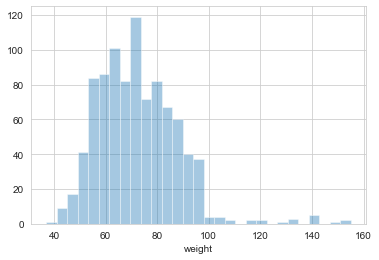

In [101]:
# Removing the impossible value
df2 = df[(df["weight"] < 200) & (df["weight"] > 35)]
sns.distplot(df2["weight"], kde=False)

In [102]:
# Variable mean steps per participant, combining Pandas .loc and .mean() with the right axis argument
df2['meanSteps'] = df.loc[:,'20-6-2013':].mean(axis=1).round(0)

/var/folders/g0/8836d8zd32s985cdf6c4jdp40000gn/T/ipykernel_32069/1296224615.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df2['meanSteps'] = df.loc[:,'20-6-2013':].mean(axis=1).round(0)
/var/folders/g0/8836d8zd32s985cdf6c4jdp40000gn/T/ipykernel_32069/1296224615.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['meanSteps'] = df.loc[:,'20-6-2013':].mean(axis=1).round(0)


In [103]:
# Showing the head() of the resulting data frame
df.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,12-5-2014,13-5-2014,city,gender,age,hh_size,education,education_1,height,weight
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,1129.0,NaN,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0


/Users/stephenbehren/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/stephenbehren/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/stephenbehren/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 70.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


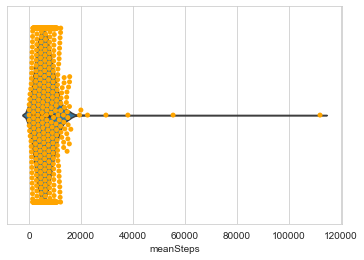

In [104]:
# Exploratory data analysis. An analysis of mean steps per participant.
# Graphing the distribution
sns.violinplot(df2['meanSteps'])
sns.swarmplot(df2['meanSteps'], color='orange')
plt.show()

In [105]:
# Summary statistics
df2.describe()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014,hh_size,education,height,weight,meanSteps
count,924.000000,24.000000,240.000000,275.000000,294.000000,351.000000,351.000000,325.000000,377.000000,416.000000,...,71.000000,86.000000,81.000000,66.000000,0.0,924.000000,924.000000,923.000000,924.000000,924.000000
mean,464.225108,3642.416667,9018.937500,10880.509091,7409.537415,8082.786325,8639.777778,8296.393846,8231.039788,9198.644231,...,9570.690141,7614.848837,6805.925926,7505.530303,NaN,2.339827,2.525974,171.725894,72.284632,6359.988095
std,267.681497,3951.910368,6444.654214,6290.354387,6744.108645,5475.644970,4793.935494,5676.436540,4309.643780,5281.718060,...,7264.297875,5521.711875,8458.979146,4706.609481,NaN,1.226864,1.273267,9.055364,15.453637,5102.782792
min,1.000000,164.000000,67.000000,25.000000,43.000000,11.000000,154.000000,7.000000,4.000000,9.000000,...,664.000000,103.000000,12.000000,388.000000,NaN,1.000000,1.000000,145.000000,37.000000,49.000000
25%,232.750000,299.500000,4364.000000,6537.500000,2761.500000,4428.000000,5212.000000,4496.000000,5235.000000,5679.000000,...,5149.000000,3950.000000,2510.000000,4932.000000,NaN,1.000000,1.000000,165.000000,61.000000,3866.250000
50%,464.500000,834.000000,8561.000000,9980.000000,5652.000000,7740.000000,8299.000000,7613.000000,8132.000000,8803.500000,...,7235.000000,6627.000000,3120.000000,6568.500000,NaN,2.000000,2.000000,172.000000,71.000000,5831.000000
75%,695.250000,6060.000000,12182.000000,14237.500000,10447.250000,10464.000000,11309.500000,11663.000000,10906.000000,12086.000000,...,12062.500000,10031.500000,6544.000000,9549.000000,NaN,3.000000,4.000000,179.000000,81.000000,7968.500000
max,929.000000,11157.000000,44944.000000,39165.000000,40392.000000,29862.000000,23902.000000,31254.000000,23836.000000,43238.000000,...,33379.000000,27605.000000,36031.000000,33660.000000,NaN,11.000000,5.000000,195.000000,155.000000,112096.000000


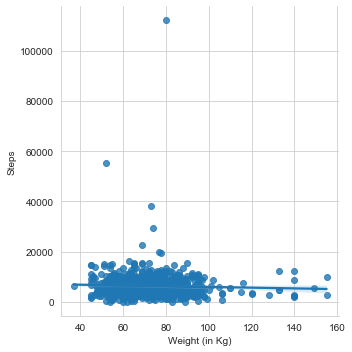

In [106]:
# Graphing the relation of mean steps per participant with two categorical variables
sns.lmplot(x='weight', y='meanSteps', data = df2)
plt.xlabel('Weight (in Kg)')
plt.ylabel('Steps')
plt.show()

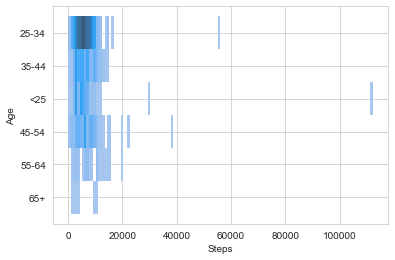

In [115]:
# Graphing the relation of mean steps per participant with two categorical variables
sns.histplot(x='meanSteps', y='age', data = df2)
plt.xlabel('Steps')
plt.ylabel('Age')
plt.show()

Explanation: The higher the age, the more steps they take.

In [114]:
df2.corr()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014,hh_size,education,height,weight,meanSteps
id,1.000000,0.216274,-0.020199,-0.045979,-0.036066,0.076695,0.002594,0.003785,0.032988,-0.041633,...,0.091816,-0.176542,-0.139740,0.004235,NaN,-0.019717,-0.006941,0.029352,0.013518,0.035631
20-6-2013,0.216274,1.000000,-0.007189,-0.109226,-0.013109,-0.158786,-0.158526,-0.115546,-0.379056,-0.366456,...,-0.561293,-0.397148,-0.056054,NaN,NaN,-0.309607,-0.299855,-0.119334,-0.320722,0.103330
21-6-2013,-0.020199,-0.007189,1.000000,0.140613,-0.057211,0.204900,0.188370,0.255593,0.141937,0.073770,...,0.207743,0.080760,0.149747,0.072339,NaN,0.108601,0.082380,-0.218418,-0.204668,0.158451
22-6-2013,-0.045979,-0.109226,0.140613,1.000000,0.399888,0.288985,0.259987,0.061111,0.181308,0.266008,...,0.014449,-0.096355,0.015653,-0.155960,NaN,0.046489,-0.034264,-0.171800,-0.198885,0.175945
23-6-2013,-0.036066,-0.013109,-0.057211,0.399888,1.000000,0.084954,0.240116,0.122920,0.194055,0.103044,...,0.382719,0.013752,0.130365,-0.344990,NaN,-0.103720,-0.114959,0.056398,0.040553,0.096705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
hh_size,-0.019717,-0.309607,0.108601,0.046489,-0.103720,0.036796,0.086014,-0.050037,0.060485,-0.001346,...,0.084060,0.036712,-0.011286,0.108789,NaN,1.000000,0.825225,-0.054545,0.006322,0.016182
education,-0.006941,-0.299855,0.082380,-0.034264,-0.114959,0.010187,0.060869,-0.056278,0.021116,0.013179,...,0.028195,-0.028467,-0.090332,0.084744,NaN,0.825225,1.000000,-0.038437,0.009232,0.032621
height,0.029352,-0.119334,-0.218418,-0.171800,0.056398,-0.168324,-0.191983,-0.224842,-0.081186,-0.095342,...,-0.136258,-0.096489,-0.102776,-0.085037,NaN,-0.054545,-0.038437,1.000000,0.510058,-0.074039
weight,0.013518,-0.320722,-0.204668,-0.198885,0.040553,-0.183793,-0.210447,-0.161315,-0.068056,-0.093107,...,0.019605,-0.100813,-0.022786,-0.027064,NaN,0.006322,0.009232,0.510058,1.000000,-0.044574
